In [2]:
#zadanie1
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [8]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(101, 13)
После:	(101, 2)


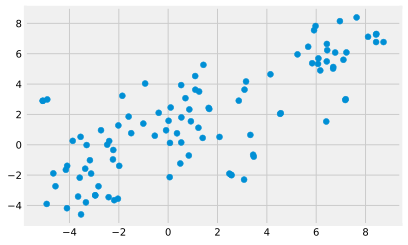

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

In [10]:
#zadanie2

In [11]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [14]:
labels_train = kmeans.fit_predict(X_train_scaled)

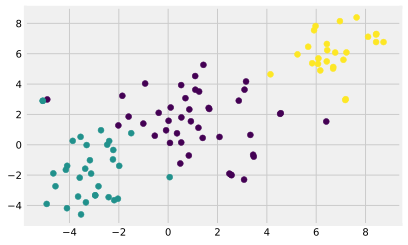

In [15]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)


plt.show()

In [18]:
print('CRIM')
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

CRIM
Кластер 0: 0.5716976744186048
Кластер 1: 0.09438812500000002
Кластер 2: 10.364110384615385


In [19]:
print('price')
print('Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train[labels_train == 2].mean()))

price
Кластер 0: 23.476744186046513
Кластер 1: 26.2125
Кластер 2: 16.869230769230768


In [20]:
#zadanie3
labels_test = kmeans.fit_predict(X_test_scaled)

In [21]:
print('price')
print('Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 2].mean()))

price
Кластер 0: 16.05038167938931
Кластер 1: 29.931818181818183
Кластер 2: 24.21442307692308


In [22]:
print('CRIM')
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

CRIM
Кластер 0: 11.079811221374047
Кластер 1: 0.061127272727272725
Кластер 2: 0.36482192307692307
